# News Sentiment Prediction


# Importing Libraries

In [41]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data Load

In [42]:
df=pd.read_csv('News Sentiment.csv')

In [43]:
df.shape

(55932, 11)

In [44]:
df.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,Facebook,GooglePlus,LinkedIn,SentimentTitle,SentimentHeadline
0,Tr3CMgRv1N,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,-1,-1,-1,0.000000,-0.053300
1,Wc81vGp8qZ,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,-1,-1,-1,0.208333,-0.156386
2,zNGH03CrZH,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-1,-1,-1,-0.425210,0.139754
3,3sM1H0W8ts,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,-1,-1,-1,0.000000,0.026064
4,wUbnxgvqaZ,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,-1,-1,-1,0.000000,0.141084


# Exploratory Data Analysis

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55932 entries, 0 to 55931
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IDLink             55932 non-null  object 
 1   Title              55932 non-null  object 
 2   Headline           55932 non-null  object 
 3   Source             55757 non-null  object 
 4   Topic              55932 non-null  object 
 5   PublishDate        55932 non-null  object 
 6   Facebook           55932 non-null  int64  
 7   GooglePlus         55932 non-null  int64  
 8   LinkedIn           55932 non-null  int64  
 9   SentimentTitle     55932 non-null  float64
 10  SentimentHeadline  55932 non-null  float64
dtypes: float64(2), int64(3), object(6)
memory usage: 4.7+ MB


df.describe(include='all').T

In [46]:
missing_val = pd.DataFrame(df.isnull().sum())
missing_val = missing_val.reset_index()
missing_val

,index,0
0,IDLink,0
1,Title,0
2,Headline,0
3,Source,175
4,Topic,0
5,PublishDate,0
6,Facebook,0
7,GooglePlus,0
8,LinkedIn,0
9,SentimentTitle,0


There is a missing value in source column. 

In [47]:
df['Topic'].value_counts()

economy      20486
obama        16917
microsoft    12911
palestine     5618
Name: Topic, dtype: int64

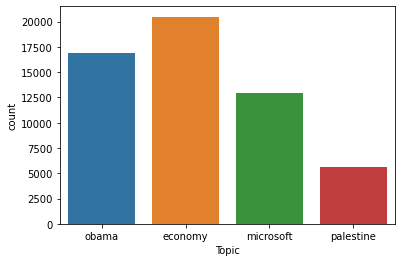

In [48]:
sns.countplot(df['Topic'])
plt.show()

In [49]:
#displaying comments on our data
df['Headline'][0]

'Obama Lays Wreath at Arlington National Cemetery. President Barack Obama has laid a wreath at the Tomb of the Unknowns to honor'

In [50]:
df['Title'][0]

'Obama Lays Wreath at Arlington National Cemetery'

# Visualization

In [51]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ss\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [52]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['Palestinian','Palestine','Microsoft','Economy','Obama','Barack'])

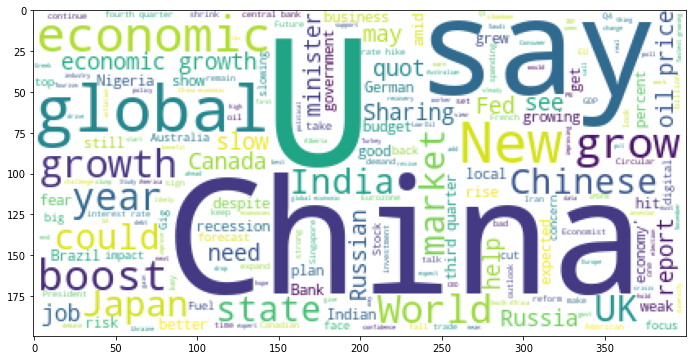

In [53]:
from wordcloud import WordCloud
plt.figure(figsize=(12,6))
text = ' '.join(df.Title[df['Topic']=='economy'])
cloud = WordCloud(background_color='white',stopwords=stopwords).generate(text)
plt.imshow(cloud)
plt.show()

We can see that that most common used word is economic, china,global

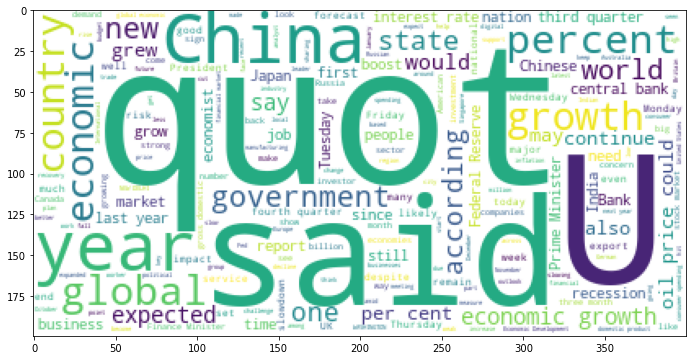

In [54]:
plt.figure(figsize=(12,6))
text = ' '.join(df['Headline'][df['Topic']=='economy'])
cloud = WordCloud(background_color='white',stopwords=stopwords).generate(text)
plt.imshow(cloud)

The most used word in headline for topic economy is quot, said, growth, country government.

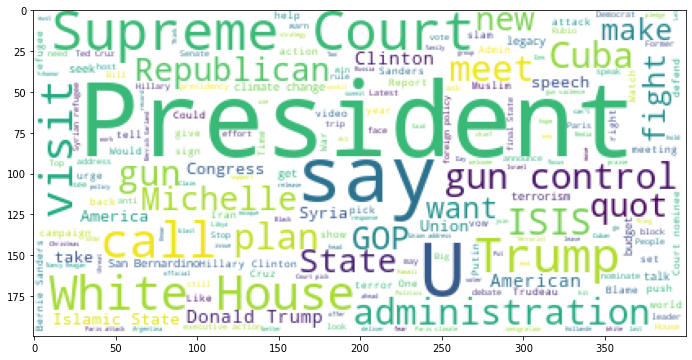

In [55]:
plt.figure(figsize=(12,6))
text = ' '.join(df.Title[df['Topic']=='obama'])
cloud = WordCloud(background_color='white',stopwords=stopwords).generate(text)
plt.imshow(cloud)

The most common used word in headline for topic obama is  president,Supreme Court,administration

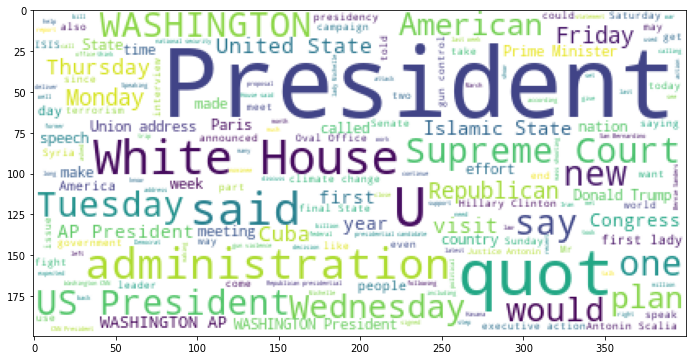

In [56]:
plt.figure(figsize=(12,6))
text = ' '.join(df['Headline'][df['Topic']=='obama'])
cloud = WordCloud(background_color='white',stopwords=stopwords).generate(text)
plt.imshow(cloud)

In headline, for Obama topic the most common used word is President, white house, congress.

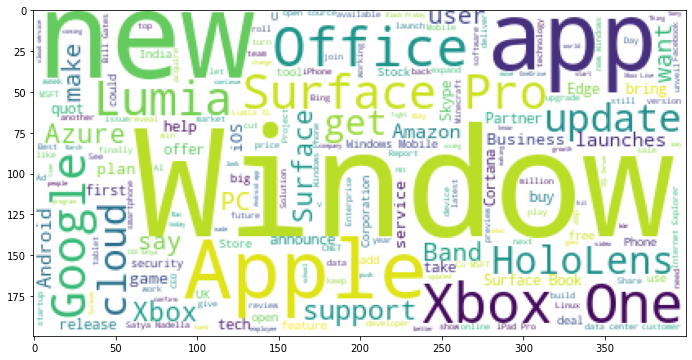

In [57]:
plt.figure(figsize=(12,6))
text = ' '.join(df.Title[df['Topic']=='microsoft'])
cloud = WordCloud(background_color='white',stopwords=stopwords).generate(text)
plt.imshow(cloud)

For title in microsoft topic, the most common word used is Window, new, app, xbox, apple.

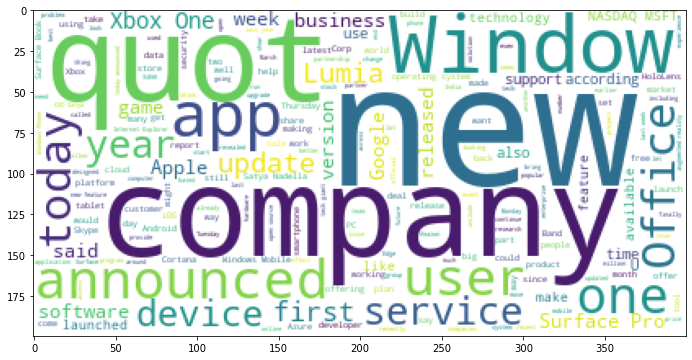

In [58]:
plt.figure(figsize=(12,6))
text = ' '.join(df['Headline'][df['Topic']=='microsoft'])
cloud = WordCloud(background_color='white',stopwords=stopwords).generate(text)
plt.imshow(cloud)

In headline, for microsoft topic the most common used word is company, window, new, quot,today

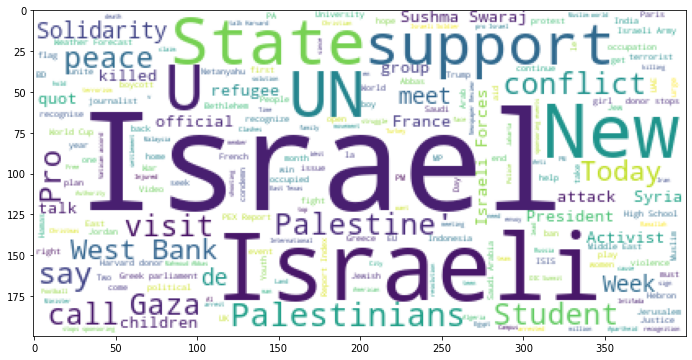

In [59]:
plt.figure(figsize=(12,6))
text = ' '.join(df.Title[df['Topic']=='palestine'])
cloud = WordCloud(background_color='white',stopwords=stopwords).generate(text)
plt.imshow(cloud)

In title,for palestine topic the most common used word is Israeli, Israel, New palstinians, UN

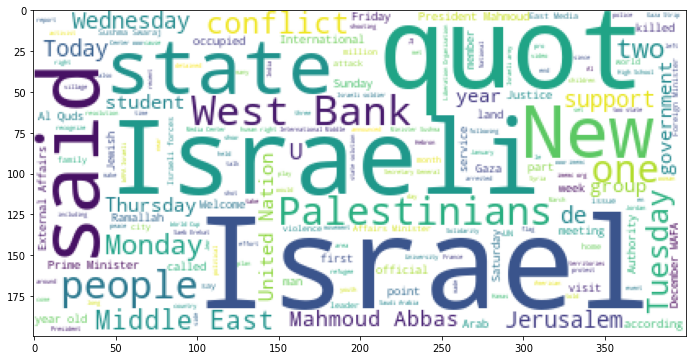

In [60]:
plt.figure(figsize=(12,6))
text = ' '.join(df['Headline'][df['Topic']=='palestine'])
cloud = WordCloud(background_color='white',stopwords=stopwords).generate(text)
plt.imshow(cloud)

In headline for palestine topic, the most common used word is Israel, Israeli, Tuesday,quot.

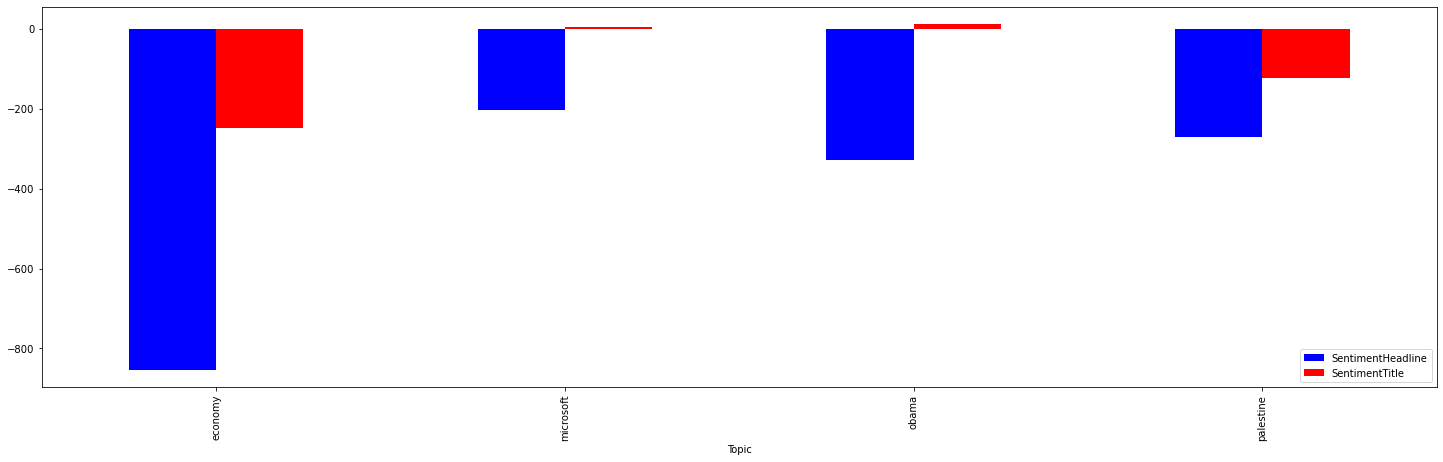

In [61]:
df.groupby('Topic')[['SentimentHeadline', 'SentimentTitle']].agg('sum').plot(kind='bar', figsize=(25, 7),
                                                          stacked=False, color=['b', 'r', 'g']);

We can see that in economy headline matters, it has high negative value

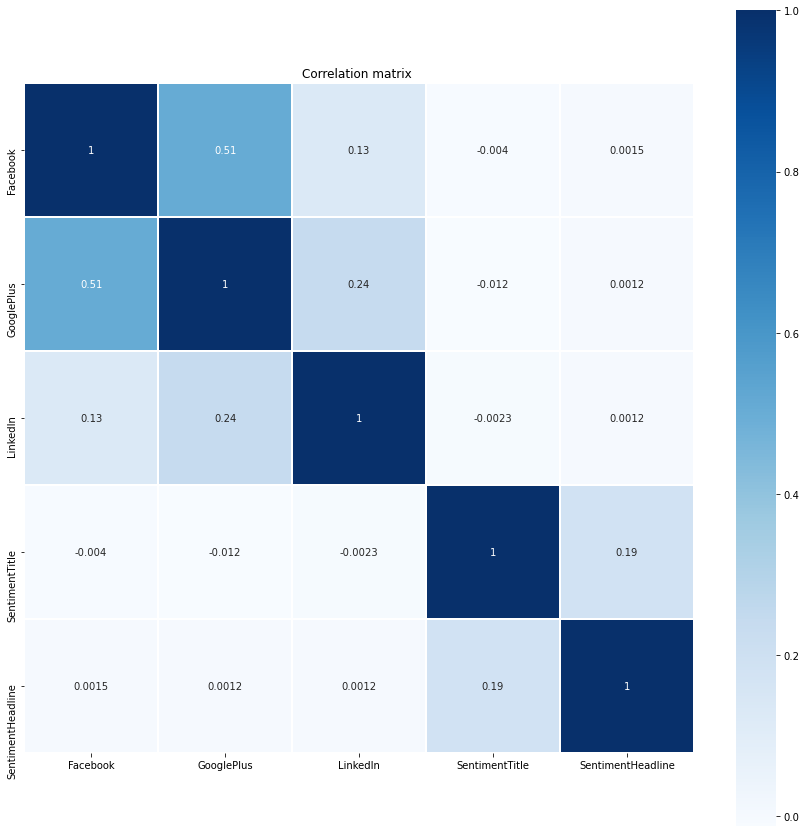

In [62]:
plt.figure(figsize=(15,15))
sns.heatmap(df[['Facebook','GooglePlus','LinkedIn','SentimentTitle','SentimentHeadline']].corr(), square=True, cmap='Blues',linewidths=0.5,linecolor='w',annot=True)
plt.title('Correlation matrix ')
plt.show()

There is a negative correlation between sentiment title with Facebook, GooglePlus, Linkedin. 

# Data Pre-Processing